### Load Modules

In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Prepare/collect data

In [2]:
import os
import cv2
import numpy as np

# Path to the training data
path = 'C:\\Desktop\\brain_tumor\\Dataset'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 2, 'glioma_tumor': 3}

X = []  # List to store image data
Y = []  # List to store labels

# Load the data
for cls in classes:
    class_path = os.path.join(path, cls)
    if not os.path.exists(class_path):
        print(f"Error: Directory '{class_path}' does not exist.")
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        
        if img is None:
            print(f"Warning: Unable to read image '{img_path}'. Skipping...")
            continue
        
        # Resize and append image
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print summary
print(f"Total images loaded: {len(X)}")
print(f"Labels distribution: {np.unique(Y, return_counts=True)}")



Total images loaded: 3160
Labels distribution: (array([0, 1, 2, 3]), array([396, 901, 937, 926], dtype=int64))


In [3]:

# Reshape data and normalize
X = X.reshape(-1, 200, 200, 1)  # Add channel dimension
X = X.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# One-hot encode labels
Y = to_categorical(Y, num_classes=len(classes))

In [4]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.regularizers import l2
# Define the CNN model with L2 regularization
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Output layer with 4 classes
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = model_cnn.fit(xtrain, ytrain, 
                        epochs=15, 
                        batch_size=32, 
                        validation_data=(xtest, ytest))

c:\Users\balavignesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.4460 - loss: 1.4964 - val_accuracy: 0.6535 - val_loss: 1.0693
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.6646 - loss: 1.0380 - val_accuracy: 0.7658 - val_loss: 0.8889
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7721 - loss: 0.8419 - val_accuracy: 0.8022 - val_loss: 0.8140
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8012 - loss: 0.7806 - val_accuracy: 0.8070 - val_loss: 0.8068
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8483 - loss: 0.7078 - val_accuracy: 0.8022 - val_loss: 0.7891
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8614 - loss: 0.6552 - val_accuracy: 0.8434 - val_loss: 0.7348
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8870 - loss: 0.6140 - val_accuracy: 0.8070 - val_loss: 0.7627
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8678 - loss: 0.6252 - val_accuracy: 0.8750 - v

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step


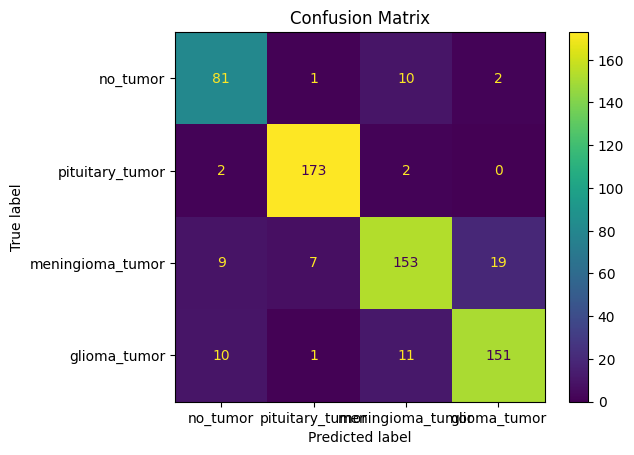

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the test set
y_pred = model_cnn.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(ytest, axis=1)           # Get true class labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.keys()))
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
# Evaluate the model

# Predict on the test set
y_pred = model_cnn.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(ytest, axis=1)           # Get true class labels
loss, accuracy = model_cnn.evaluate(xtest, ytest)
print(f"Accuracy: {accuracy * 100:.2f}%")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')*100 # Use 'weighted' for multiclass
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')*100
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')*100

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - accuracy: 0.8749 - loss: 0.6846
Accuracy: 88.29%
Precision: 88.32
Recall: 88.29
F1 Score: 88.25


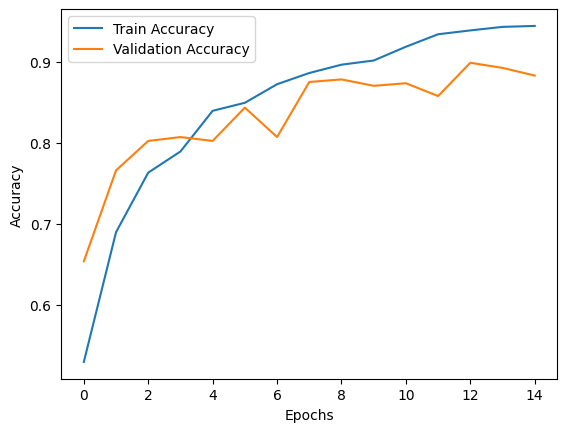

In [8]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Save the model for future use
model_cnn.save('tumor_classification_model.h5')